<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=119650307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Feb-19


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
total 208
-rw-r--r-- 1 nobody nogroup 211340 Feb 19 14:10 'Shark Tank US dataset.csv'

There are 995 rows and 51 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1             1   
1              1    09-Aug-09  05-Feb-10               1             2   
2              1    09-Aug-09  05-Feb-10               1             3   
3              1    09-Aug-09  05-Feb-10               1             4   
4              1    09-Aug-09  05-Feb-10               1             5   

               Startup Name           Industry  \
0            AvaTheElephant    Health/Wellness   
1        Mr.Tod'sPieFactory  Food and Beverage   
2                   Wispots  Business Services   
3  CollegeFoxesPackingBoxes     Lifestyle/Home   
4                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers State Pitchers City Pitchers Average Age  \
0             GA       Atlanta                  NaN   
1             NJ      Somerset                  NaN   
2             NC          Cary                  NaN   
3             FL         Tampa                  NaN   
4             MN      St. Paul                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0            NaN              50000.0   
1                     0.0            NaN             460000.0   
2                     0.0            NaN            1200000.0   
3                     0.0            NaN             250000.0   
4                     0.0            NaN            1000000.0   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0             333333.0         1            50000.0   
1                     10.0            4600000.0         1           460000.0   
2                     10.0           12000000.0         0                NaN   
3                     25.0            1000000.0         0                NaN   
4                     15.0            6666667.0         0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   Investment Amount Per Shark  ...  Royalty Deal  Loan  \
0                      50000.0  ...           NaN   NaN   
1                     230000.0  ...           NaN   NaN   
2                          NaN  ...           NaN   NaN   
3                          NaN  ...           NaN   NaN   
4                          NaN  ...           NaN   NaN   

   Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                

In [6]:
shark_tank.tail(10).T

985              986  \
Season Number                                            11               11   
Season Start                                      29-Sep-19        29-Sep-19   
Season End                                        15-May-20        15-May-20   
Episode Number                                           23               23   
Pitch Number                                            986              987   
Startup Name                             SlateChocolateMilk      RescueReady   
Industry                                  Food and Beverage   Lifestyle/Home   
Business Description                Slate Chocolate Milk -   Rescue Ready -    
Pitchers Gender                                        Male             Male   
Pitchers State                                          NaN              NaN   
Pitchers City                                           NaN              NaN   
Pitchers Average Age                                    NaN              NaN   
Entrepreneur Names                                      NaN              NaN   
Company Website                                         NaN              NaN   
Multiple Entrepreneurs                                  NaN              NaN   
US Viewership                                           NaN              NaN   
Original Ask Amount                                400000.0          75000.0   
Original Offered Equity                                10.0             15.0   
Valuation Requested                               4000000.0         500000.0   
Got Deal                                                  0                0   
Total Deal Amount                                       NaN              NaN   
Total Deal Equity                                       NaN              NaN   
Deal Valuation                                          NaN              NaN   
Number of sharks in deal                                NaN              NaN   
Investment Amount Per Shark                             NaN              NaN   
Equity Per Shark                                        NaN              NaN   
Royalty Deal                                            NaN              NaN   
Loan                                                    NaN              NaN   
Barbara Corcoran Investment Amount                      NaN              NaN   
Barbara Corcoran Investment Equity                      NaN              NaN   
Mark Cuban Investment Amount                            NaN              NaN   
Mark Cuban Investment Equity                            NaN              NaN   
Lori Greiner Investment Amount                          NaN              NaN   
Lori Greiner Investment Equity                          NaN              NaN   
Robert Herjavec Investment Amount                       NaN              NaN   
Robert Herjavec Investment Equity                       NaN              NaN   
Daymond John Investment Amount                          NaN              NaN   
Daymond John Investment Equity                          NaN              NaN   
Kevin O Leary Investment Amount                         NaN              NaN   
Kevin O Leary Investment Equity                         NaN              NaN   
Guest Investment Amount                                 NaN              NaN   
Guest Investment Equity                                 NaN              NaN   
Barbara Corcoran Present                                NaN              NaN   
Mark Cuban Present                                      NaN              NaN   
Lori Greiner Present                                    NaN              NaN   
Robert Herjavec Present                                 NaN              NaN   
Daymond John Present                                    NaN              NaN   
Kevin O Leary Present                                   NaN              NaN   
Kevin Harrington Present                                NaN              NaN   
Guest Name                                              

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

Season Number Season Start Season End  Episode Number  Pitch Number  \
153              3    20-Jan-12  18-May-12              14           154   
592              7    25-Sep-15  20-May-16              25           593   
154              3    20-Jan-12  18-May-12              14           155   
833             10    07-Oct-18  12-May-19               8           834   
848             10    07-Oct-18  12-May-19              12           849   
168              4    14-Sep-12  17-May-13               3           169   
956             11    29-Sep-19  15-May-20              16           957   
907             11    29-Sep-19  15-May-20               4           908   
934             11    29-Sep-19  15-May-20              10           935   
151              3    20-Jan-12  18-May-12              13           152   

                Startup Name                 Industry  \
153    WildSquirrelNutButter        Food and Beverage   
592  Jarrett&RajaProductions      Media/Entertainment   
154                MixBikini           Fashion/Beauty   
833                   BollyX  Fitness/Sports/Outdoors   
848                  ZuGoPet             Pet Products   
168                RockBands           Fashion/Beauty   
956           BohoCamperVans  Fitness/Sports/Outdoors   
907                Snacklins        Food and Beverage   
934                     ZUUM  Fitness/Sports/Outdoors   
151                  Skyride  Fitness/Sports/Outdoors   

                          Business Description Pitchers Gender Pitchers State  \
153  Wild Squirrel Nut Butter - Specialty Food          Female             OR   
592              Jarrett & Raja Productions -             Male             NV   
154               Mix Bikini - Women's Apparel            Male             NY   
833          BollyX - bollywood dance workouts            Male            NaN   
848         ZuGoPet - travel products for pets          Female             TX   
168   Rock Bands - Men and Women's Accessories            Male             FL   
956                        Boho Camper Vans -             Male            NaN   
907                               Snacklins -             Male            NaN   
934                                    ZUUM -             Male            NaN   
151               Skyride - Outdoor Recreation            Male             NY   

    Pitchers City Pitchers Average Age                     Entrepreneur Names  \
153      Portland                  NaN       Erika Welsh and Keeley Tillotson   
592           NaN                  NaN                                    NaN   
154      New York                  NaN  Frank Scozzafava and Adam DiSilvestro   
833           NaN                  NaN                                    NaN   
848           NaN                  NaN                                    NaN   
168     Hollywood                  NaN                           Lee Dahlberg   
956           NaN                  NaN                                    NaN   
907           NaN                  NaN                                    NaN   
934           NaN                  NaN                                    NaN   
151      New York                  NaN                           Scotty Olson   

                       Company Website  Multiple Entrepreneurs  US Viewership  \
153  https://www.wildfriendsfoods.com/                       1            NaN   
592                                NaN                    <NA>            NaN   
154                                NaN                       1            NaN   
833                                NaN                    <NA>            NaN   
848                                NaN                    <NA>            NaN   
168   http://www.leatherrockbands.com/                       0            NaN   
956                                NaN                    <NA>            NaN   
907                                NaN                    <NA>            NaN   
934                        

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       995 non-null    Int32  
 1   Season Start                        995 non-null    object 
 2   Season End                          995 non-null    object 
 3   Episode Number                      995 non-null    Int32  
 4   Pitch Number                        995 non-null    Int32  
 5   Startup Name                        995 non-null    object 
 6   Industry                            995 non-null    object 
 7   Business Description                995 non-null    object 
 8   Pitchers Gender                     991 non-null    object 
 9   Pitchers State                      734 non-null    object 
 10  Pitchers City                       495 non-null    object 
 11  Pitchers Average Age                2 non-nul

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 12
Number of unique values in Season Start - 12
Number of unique values in Season End - 12
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 995
Number of unique values in Startup Name - 993
Number of unique values in Industry - 15
Number of unique values in Business Description - 993
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers City - 249
Number of unique values in Pitchers Average Age - 2
Number of unique values in Entrepreneur Names - 422
Number of unique values in Company Website - 431
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 2
Number of unique values in Original Ask Amount - 72
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 158
Number of unique values in Got Deal - 2
Number of unique values in Total Deal 

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

12 seasons 

995 startup companies came for pitching 



In [13]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [14]:
# Types of industries, came for investments
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=600)
fig.update_yaxes(title_text="")
fig.show()

Food and Beverage          202
Fashion/Beauty             178
Lifestyle/Home             159
Children/Education         102
Fitness/Sports/Outdoors    101
Software/Tech               63
Health/Wellness             48
Pet Products                43
Business Services           29
Media/Entertainment         23
Automotive                  12
Green/CleanTech             11
Travel                      11
Uncertain/Other              9
nan                          4
Name: Industry, dtype: int64


Male          584
Female        245
Mixed Team    162
Name: Pitchers Gender, dtype: int64



<AxesSubplot:ylabel='Pitchers Gender'>

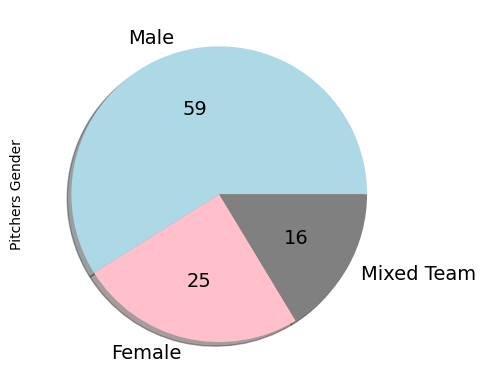

In [15]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts())
print()
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

### 💹 57% companies received offers and 43% startups could not convince Sharks to invest

1    564
0    431
Name: Got Deal, dtype: int64 

1    57%
0    43%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

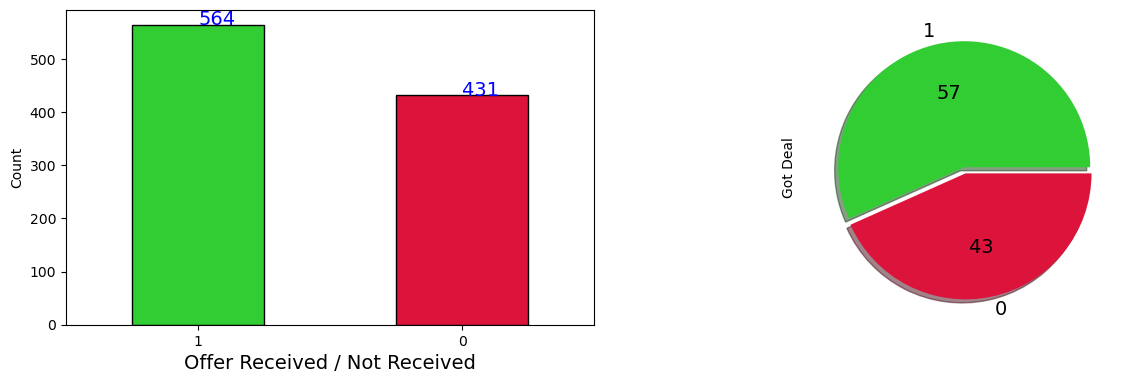

In [16]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 564 companies received offers & 431 startups could not convince #Sharks to invest.

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
#### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [17]:
IFrame('https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1', width=1000, height=1000)

In [18]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [19]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [20]:
# Sum of investment amount asked
print("Sum of investment amount asked, by all startup companies, in Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Shark Tank - $278,507,000


In [21]:
# Amount invested by all sharks
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $162,854,666


In [22]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest Investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                         5000000.0
MokiDoorstep                   3000000.0
SynDaverLabs                   3000000.0
Zipz                           2500000.0
Fizzics                        2000000.0
TenThirtyOneHauntedHayrides    2000000.0
Vengo                          2000000.0
RuggedManiac                   1750000.0
BeyondSushi                    1500000.0
Sworkit                        1500000.0
XCraft                         1500000.0
Trunkster                      1400000.0
HyConn                         1250000.0
Jackson'sHonest                1250000.0
TheRedDressBoutique            1200000.0
Name: Total Deal Amount, dtype: float64


In [23]:
# Top 15 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
Name: Total Deal Equity, dtype: float64


In [24]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].sum(),"\n")

shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who got debt/loan amount 37.0 



Season Number                Startup Name  Original Ask Amount  \
272              5            RapidRamenCooker             300000.0   
289              5  BetterLifeCleaningProducts             400000.0   
291              5          PaparazziProposals             250000.0   
299              5  Grace&LaceKnittedBootSocks             175000.0   
300              5    YuboCustomizedLunchBoxes             150000.0   
433              6       Scratch&GrainBakingCo             150000.0   
459              6                    CocoJack             125000.0   
520              7               SavvyNaturals             200000.0   
563              7                     Sworkit            1500000.0   
571              7                  BetterBack             750000.0   
580              7                       Vengo            2000000.0   
586              7                     Coolbox             500000.0   
621              8                      TekDry             500000.0   
622              8              NightRunner270             250000.0   
636              8                   StyleClub             500000.0   
640              8   Jack'sStands&Marketplaces              50000.0   
642              8                        Toor             500000.0   
647              8                     Inboard             750000.0   
651              8               SealedbySanta             150000.0   
670              8               Dbestproducts             350000.0   
684              8        BlentiqueWineCompany             250000.0   
686              8                    Rareform             300000.0   
703              8                 Wine&Design             500000.0   
733              9                    WaiveCar             500000.0   
753              9                  EverlyWell            1000000.0   
754              9                        Mush             300000.0   
759              9                     Frywall             100000.0   
764              9                     Stasher             400000.0   
791              9                GunnarOptiks             750000.0   
845             10            MakeupJunkieBags             200000.0   
899             11                 BoostOxygen            1000000.0   
924             11                       Outer             750000.0   
931             11                  Flexscreen             800000.0   
955             11                      Bohana             200000.0   
956             11              BohoCamperVans             300000.0   
959             11                       Goumi            1000000.0   
974             11                MuralPainter             300000.0   

     Total Deal Amount  Total Deal Equity  
272           300000.0              15.00  
289           400000.0              17.00  
291           250000.0              33.00  
299           175000.0              10.00  
300           150000.0              20.00  
433           150000.0              20.00  
459           125000.0              25.00  
520           200000.0              40.00  
563          1500000.0              10.00  
571           750000.0               7.50  
580          2000000.0              10.00  
586           500000.0              15.00  
621           500000.0               5.00  
622           200000.0              15.00  
636           500000.0              22.00  
640                NaN                NaN  
642           500000.0              10.00  
647           750000.0               4.00  
651           150000.0              20.00  
670           350000.0              20.00  
684           250000.0              10.00  
686           300000.0              10.00  
703           500000.0              10.00  
733           500000.0               2.00  
753          1000000.0               5.00  
754           300000.0              10.00  
759           100000.0              10.00  
764           400000.0              15.00  
791           750000.0        

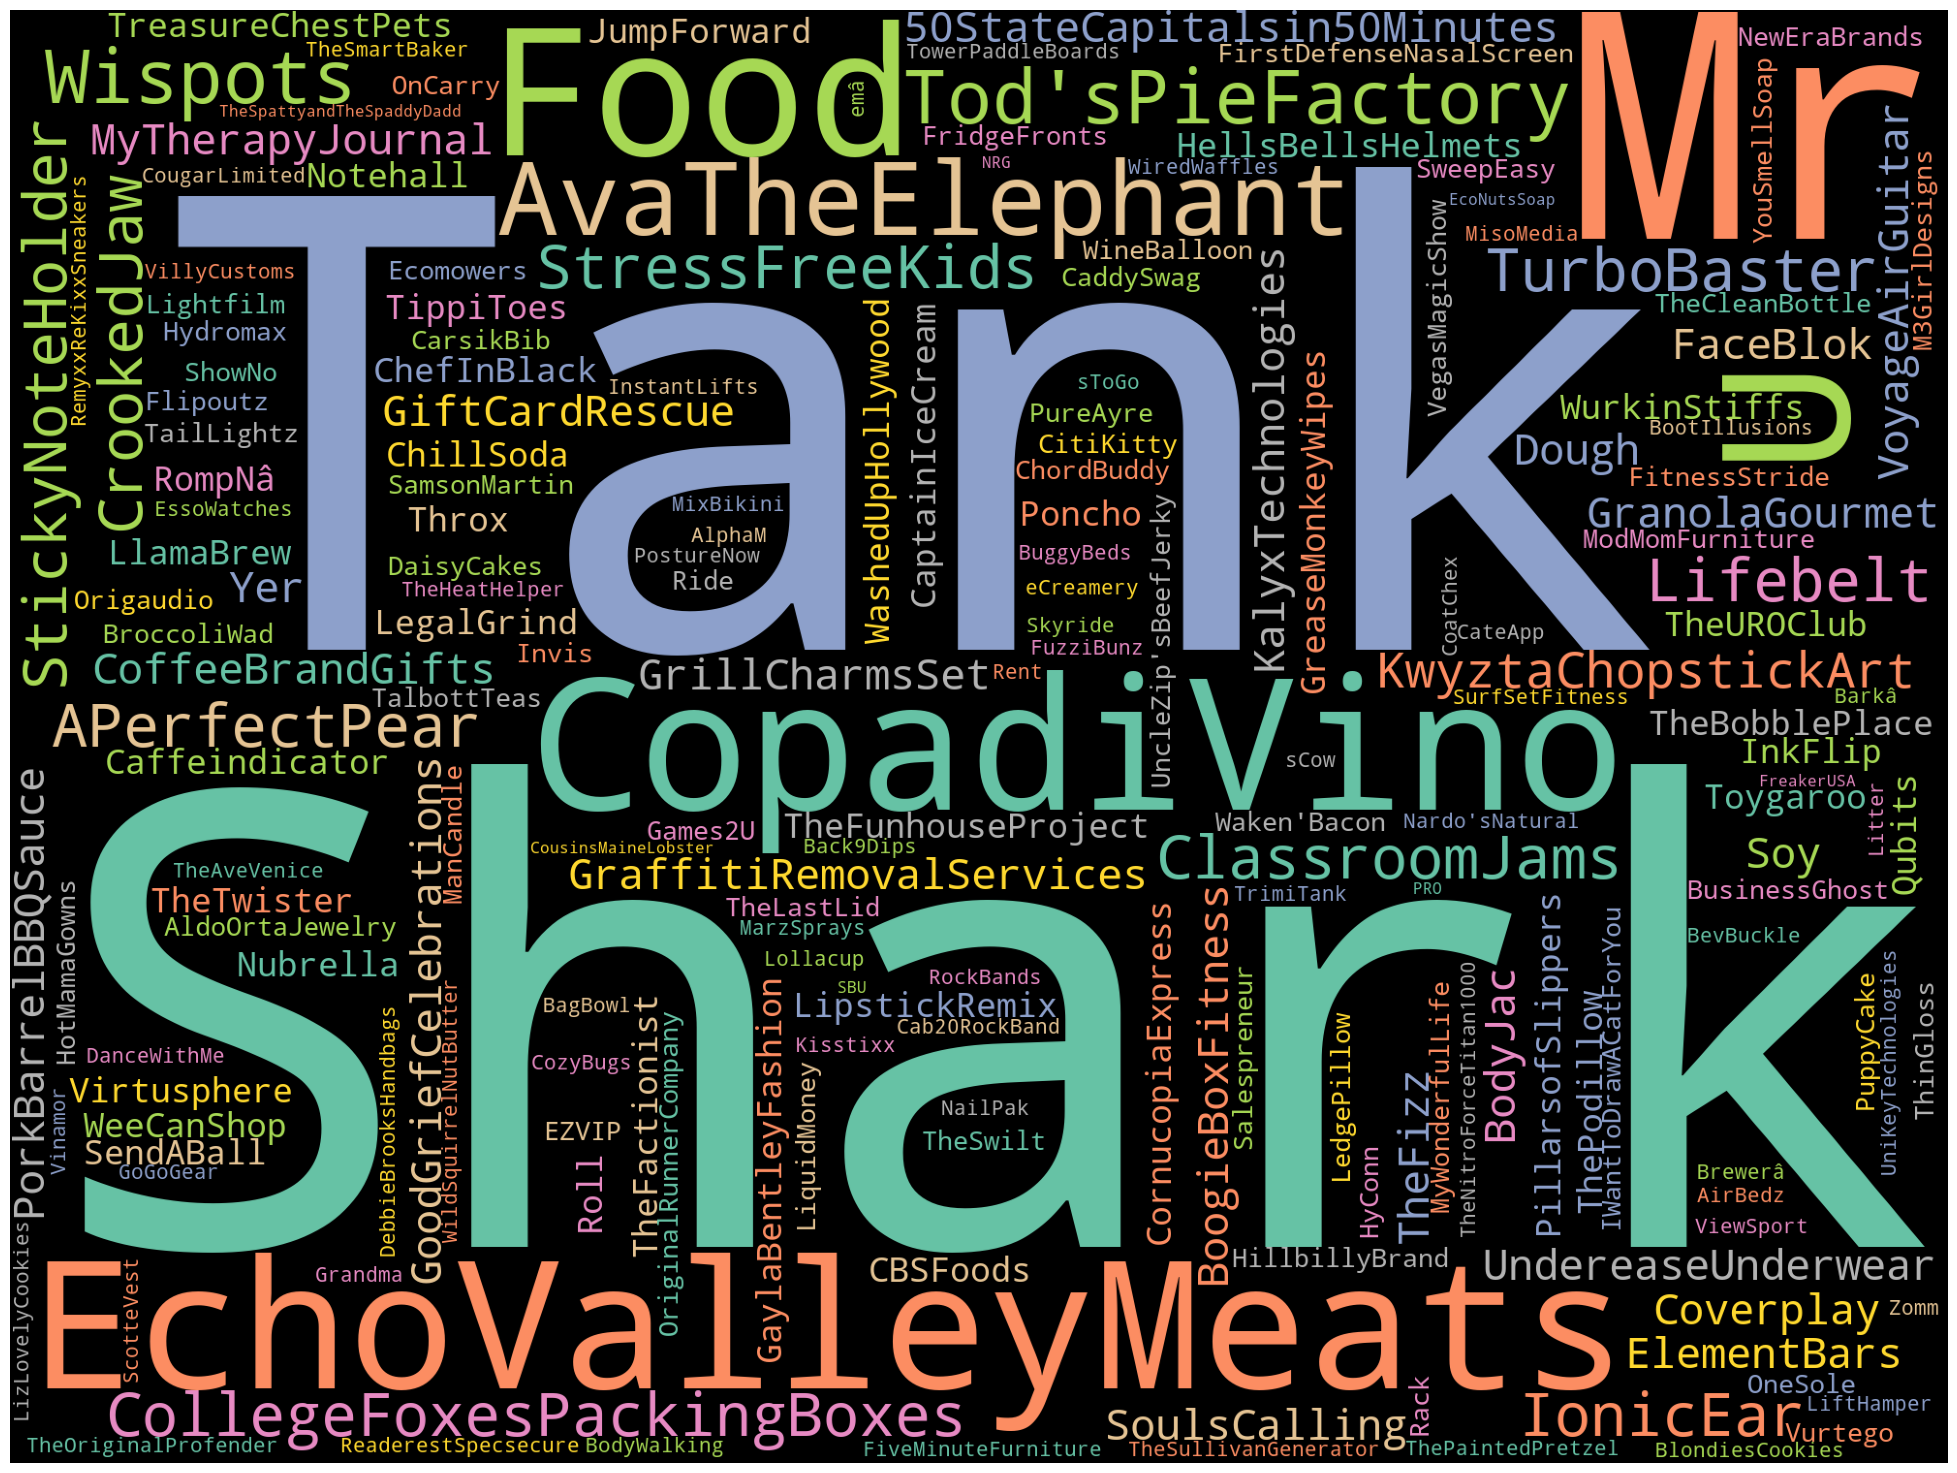

In [25]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

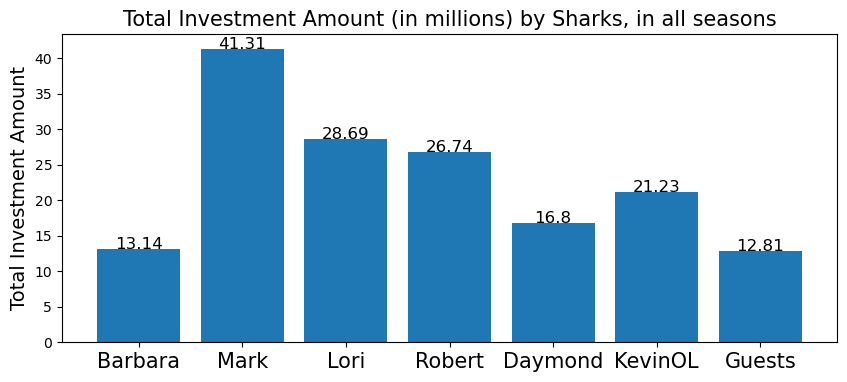

In [26]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

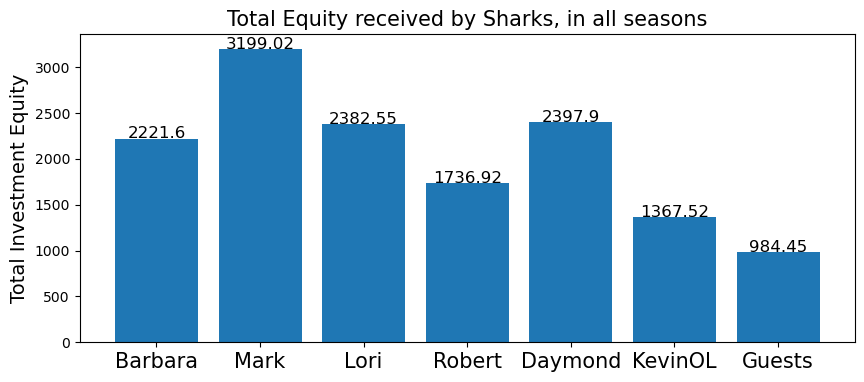

In [27]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Equity",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks, in all seasons", fontsize=15)
plt.show()

## Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

1.0    414
2.0    121
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    22%
3.0     3%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


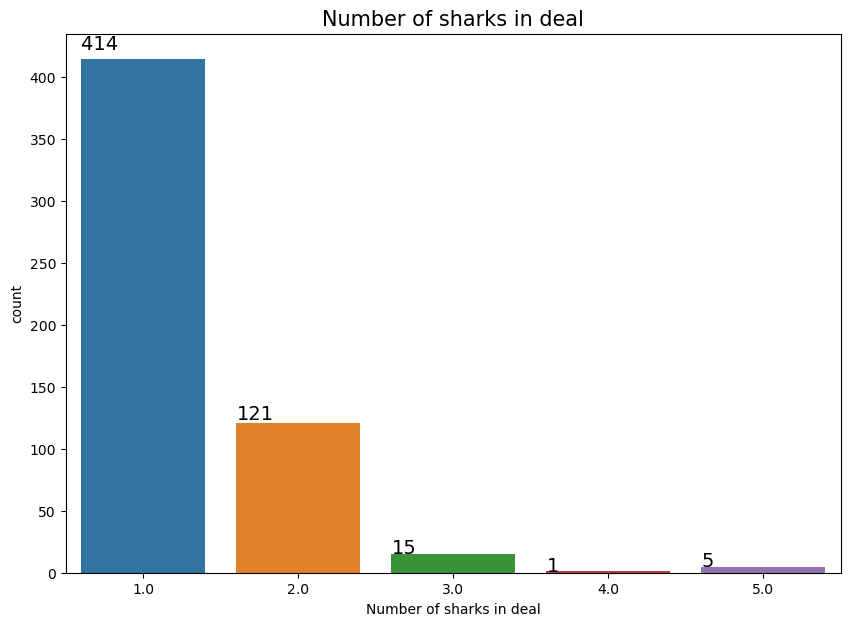

In [28]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal", fontsize=15)
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [29]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [30]:
shark_tank['Number of sharks in deal'].value_counts()

1.0    414
2.0    121
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 92
Investment amount by Barbara Corcoran $13,140,000
Equity received by Barbara Corcoran 2221.6 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet 

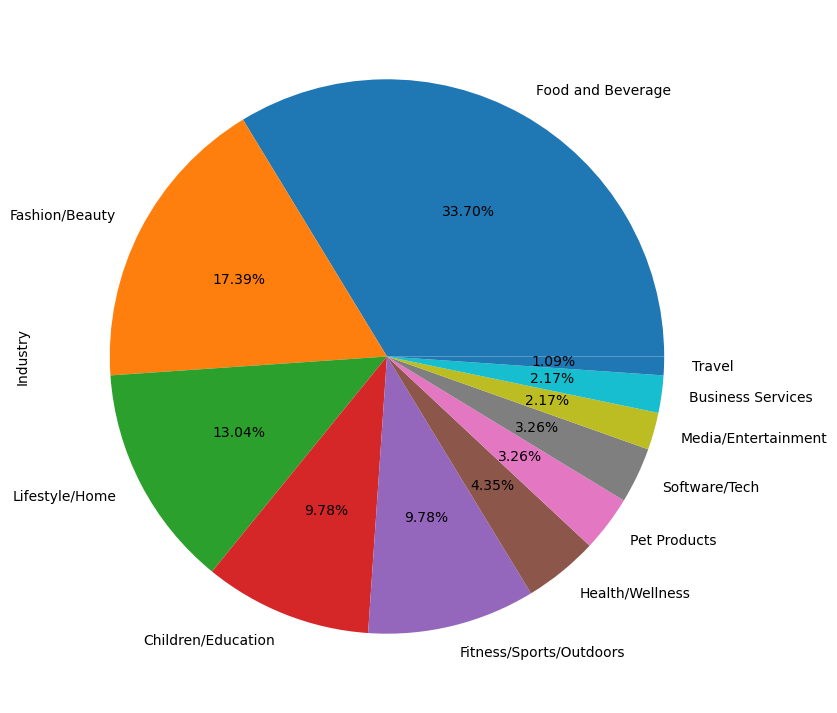

In [31]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-2:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.bar(tmpdf, x="Barbara Corcoran Investment Equity", y='Barbara Corcoran Investment Amount', color="Startup Name", title="<b>Total equity received by Barbara Corcoran (in %) for investment</b>", text=tmpdf['Barbara Corcoran Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 68
Investment amount by Mark Cuban $41,310,000
Equity received by Mark Cuban 3199.02 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Mark Cuban Investment Amount
              ClassroomJams      Children/Education                  5.000000e+04
                  TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                   Toygaroo      Children/Education                  1.000000e+05
    FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                     HyConn         Uncertain/Other                  1.250000e+06
                      EZVIP     Media/Entertainment                  7.500000e+04
             TheCleanBottle       Food and Beverage                  6.000000e+04
      IWantToDrawACatForYou           Software/Tech                  2.500000e+04
                WineBalloo

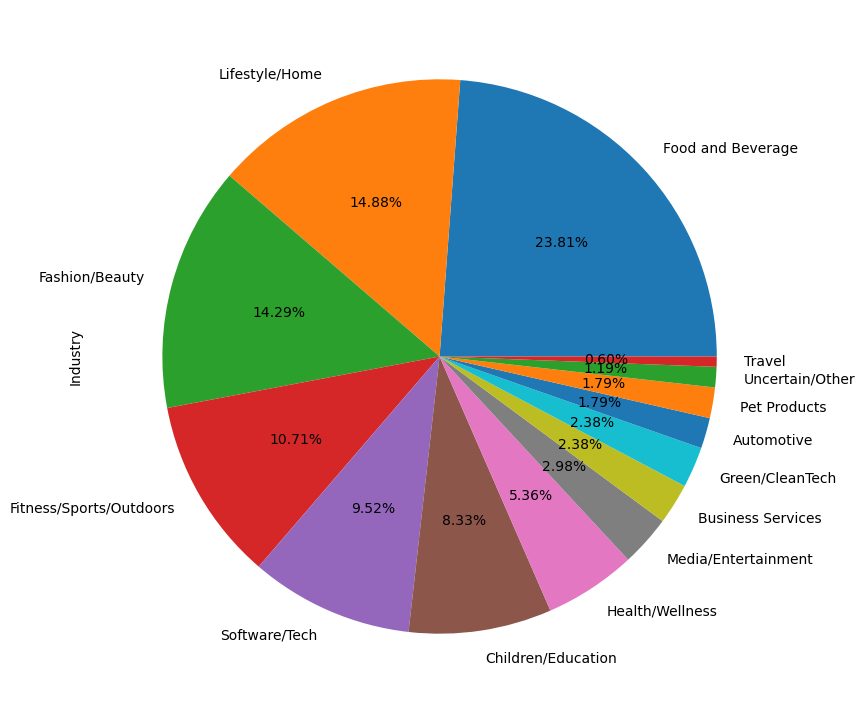

In [32]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-2:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.bar(tmpdf, x="Mark Cuban Investment Equity", y='Mark Cuban Investment Amount', color="Startup Name", title="<b>Total equity received by Mark Cuban (in %) for investment</b>", text=tmpdf['Mark Cuban Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 40
Investment amount by Lori Greiner $28,687,500
Equity received by Lori Greiner 2382.55 % in different companies

Company details:
---------------------------------------------------------------------------
              Startup Name                Industry  Lori Greiner Investment Amount
                    ShowNo          Fashion/Beauty                     75000.00000
             M3GirlDesigns          Fashion/Beauty                    100000.00000
       ReaderestSpecsecure          Lifestyle/Home                    150000.00000
                   NailPak          Fashion/Beauty                     50000.00000
                   BagBowl          Lifestyle/Home                     40000.00000
                 Back9Dips       Food and Beverage                     75000.00000
                MarzSprays         Health/Wellness                    200000.00000
                ScrubDaddy          Lifestyle/Home                    200000.00000
           

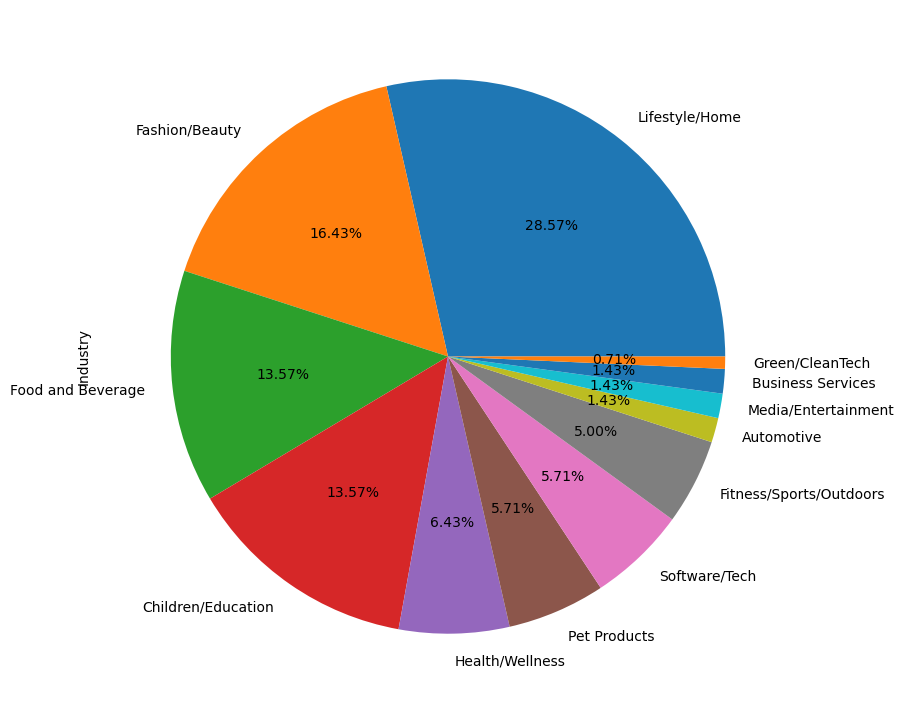

In [33]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-2:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.bar(tmpdf, x="Lori Greiner Investment Equity", y='Lori Greiner Investment Amount', color="Startup Name", title="<b>Total equity received by Lori Greiner (in %) for investment</b>", text=tmpdf['Lori Greiner Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 93
Investment amount by Robert Herjavec $26,744,832.67
Equity received by Robert Herjavec 1736.92 % in different companies

Company details:
---------------------------------------------------------------------------
                 Startup Name                Industry  Robert Herjavec Investment Amount
                 APerfectPear       Food and Beverage                       2.500000e+05
                ClassroomJams      Children/Education                       5.000000e+04
               GiftCardRescue           Software/Tech                       1.000000e+05
             MyTherapyJournal         Health/Wellness                       4.000000e+04
                Soy-Yer-Dough       Food and Beverage                       1.000000e+05
               GrillCharmsSet          Fashion/Beauty                       5.000000e+04
                  JumpForward      Children/Education                       3.000000e+05
            GreaseMonkeyWipes     

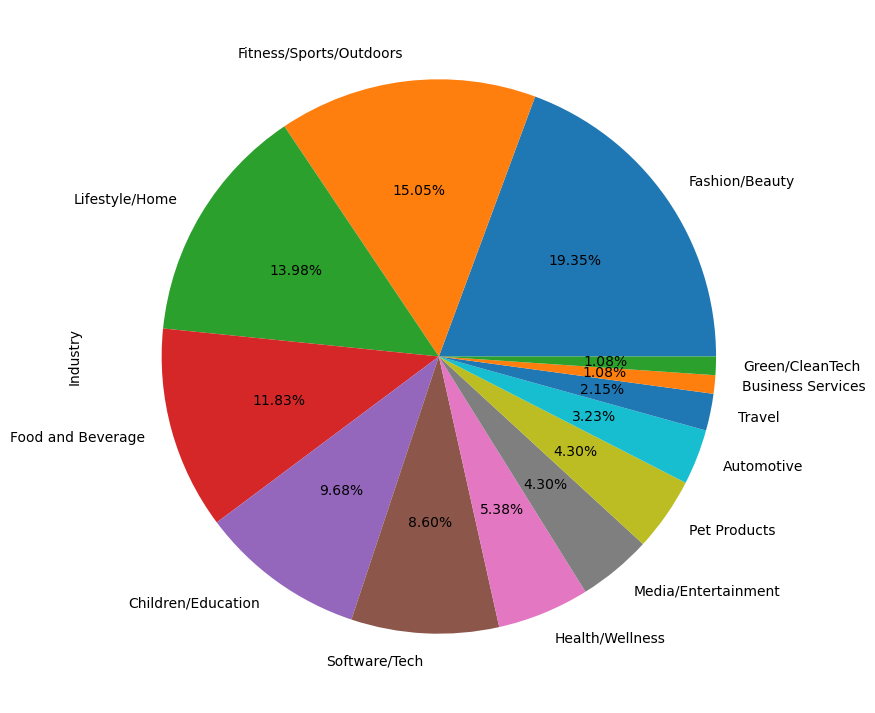

In [34]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-2:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.bar(tmpdf, x="Robert Herjavec Investment Equity", y='Robert Herjavec Investment Amount', color="Startup Name", title="<b>Total equity received by Robert Herjavec (in %) for investment</b>", text=tmpdf['Robert Herjavec Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John 89
Investment amount by Daymond John $16,801,500
Equity received by Daymond John 2397.9 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                        230000.0
              ClassroomJams      Children/Education                         50000.0
              Soy-Yer-Dough       Food and Beverage                        100000.0
          TreasureChestPets            Pet Products                         50000.0
        GaylaBentleyFashion          Fashion/Beauty                        125000.0
          HellsBellsHelmets Fitness/Sports/Outdoors                        500000.0
              LipstickRemix          Fashion/Beauty                         52500.0
                   Nubrella          Fashion/Beauty                        200000.0
   

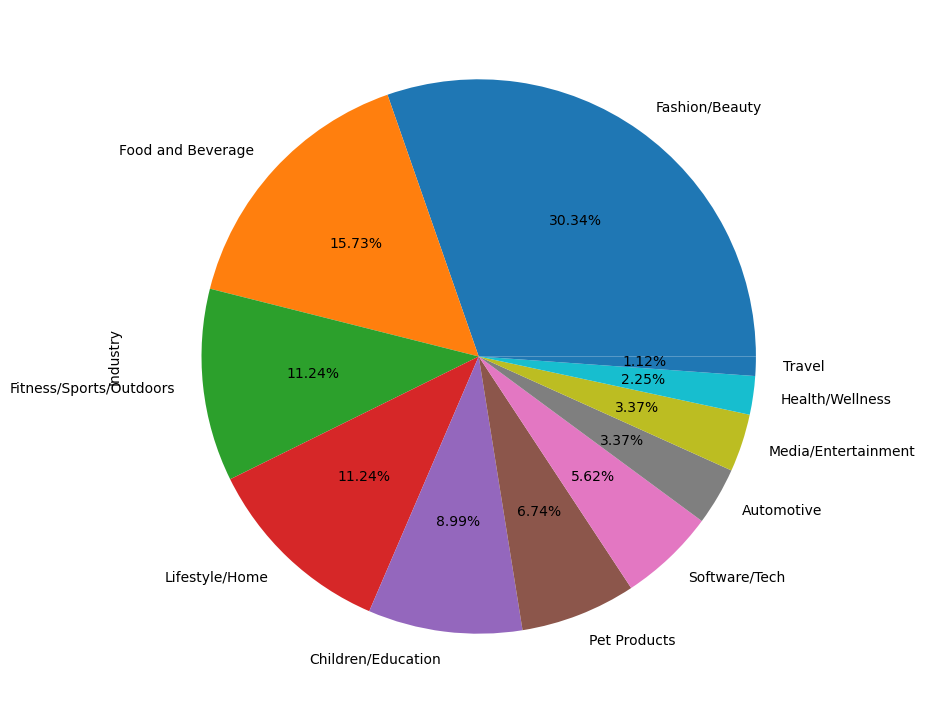

In [35]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-2:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.bar(tmpdf, x="Daymond John Investment Equity", y='Daymond John Investment Amount', color="Startup Name", title="<b>Total equity received by Daymond John (in %) for investment</b>", text=tmpdf['Daymond John Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 88
Investment amount by Kevin O Leary $21,232,500
Equity received by Kevin O Leary 1367.52 % in different companies

Company details:
---------------------------------------------------------------------------
            Startup Name                Industry  Kevin O Leary Investment Amount
            APerfectPear       Food and Beverage                     2.500000e+05
           ClassroomJams      Children/Education                     5.000000e+04
          GiftCardRescue           Software/Tech                     1.000000e+05
        MyTherapyJournal         Health/Wellness                     4.000000e+04
           Soy-Yer-Dough       Food and Beverage                     1.000000e+05
             JumpForward      Children/Education                     3.000000e+05
                Toygaroo      Children/Education                     1.000000e+05
            FridgeFronts          Lifestyle/Home                     5.000000e+04
             Talb

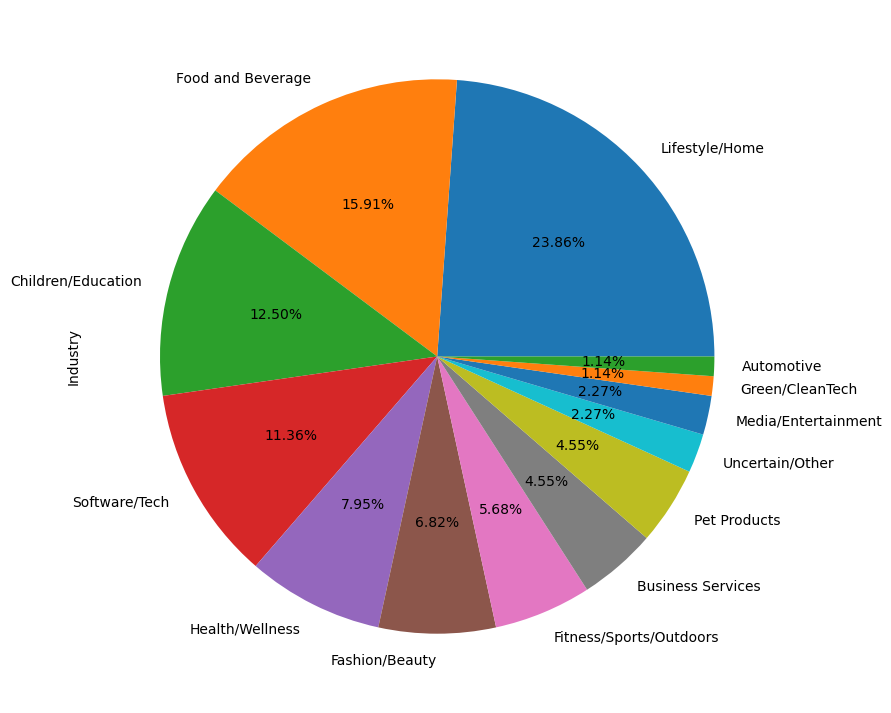

In [36]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-2:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.bar(tmpdf, x="Kevin O Leary Investment Equity", y='Kevin O Leary Investment Amount', color="Startup Name", title="<b>Total equity received by Kevin O Leary (in %) for investment</b>", text=tmpdf['Kevin O Leary Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎆 Guest's Investments

Total investments by all Guests 57
Investment amount by all Guests $12,808,333.33
Equity received by all Guests 984.45 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Guest Investment Amount
            TurboBaster       Food and Beverage             3.500000e+04
            ElementBars Fitness/Sports/Outdoors             1.500000e+05
             TheUROClub Fitness/Sports/Outdoors             2.500000e+04
         Caffeindicator       Food and Beverage             2.000000e+05
               Hydromax Fitness/Sports/Outdoors             5.000000e+04
               TreeTPee         Green/CleanTech             1.500000e+05
     TheCookieDoughCafe       Food and Beverage             5.000000e+04
            KitchenSafe       Food and Beverage             5.000000e+04
             SharkWheel Fitness/Sports/Outdoors             7.500000e+04
               thebeebo      Chi

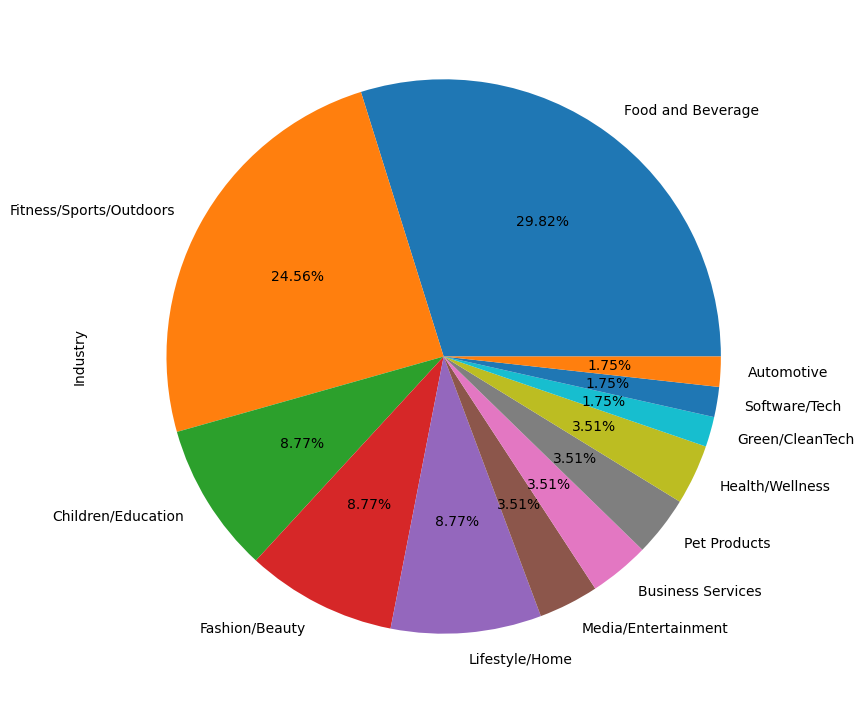

In [37]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.bar(tmpdf, x="Guest Investment Equity", y='Guest Investment Amount', color="Startup Name", title="<b>Total equity received by Guest (in %) for investment</b>", text=tmpdf['Guest Investment Amount'].map(int).map(str))
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

In [38]:
# US states of pitcher's
print(shark_tank['Pitchers State'].value_counts(), "\n")

CA        207
NY         70
TX         55
FL         47
IL         31
GA         23
UT         23
CO         23
MA         21
PA         20
NC         19
OR         19
OH         19
WA         15
NJ         13
AZ         13
VA         10
MI          9
NV          9
CT          7
DC          6
MO          6
MN          6
TN          5
IN          5
MD          5
VT          4
OK          4
HI          4
WI          4
SC          4
KS          3
MS          3
LA          3
ID          3
RI          3
AR          2
KY          2
AL          2
NE          1
NH          1
IA          1
MT          1
DE          1
AK          1
Canada      1
Name: Pitchers State, dtype: int64 



In [39]:
# Top 20 cities
print(shark_tank['Pitchers City'].value_counts().nlargest(20), "\n")

Los Angeles       41
New York          30
San Francisco     25
Chicago           14
Austin            13
Atlanta           11
Portland          10
San Diego         10
Dallas             8
Houston            5
Boston             5
Miami              5
Tampa              5
Denver             5
Pittsburgh         5
Provo              4
Las Vegas          4
Salt Lake City     4
Washington         4
Philadelphia       4
Name: Pitchers City, dtype: int64 



In [40]:
# Many (90+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name  Original Ask Amount  Total Deal Amount
15             GiftCardRescue             150000.0           200000.0
30              Soy-Yer-Dough             125000.0           300000.0
43                JumpForward             150000.0           600000.0
64               WurkinStiffs              85000.0           100000.0
65                  TippiToes              30000.0           100000.0
..                        ...                  ...                ...
925  Mrs.Goldfarb'sUnrealDeli             100000.0           250000.0
937        WisePocketProducts              30000.0            35000.0
940               GeniusJuice             250000.0           500000.0
944               BalaBangles             400000.0           900000.0
987        YellowLeafHammocks             400000.0          1000000.0

[97 rows x 3 columns]

In [41]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Offered Equity","Total Deal Equity"]]

Startup Name  Original Offered Equity  Total Deal Equity
0        AvaTheElephant                     15.0               55.0
1    Mr.Tod'sPieFactory                     10.0               50.0
5          APerfectPear                     15.0               50.0
6         ClassroomJams                     10.0              100.0
10          TurboBaster                     35.0              100.0
..                  ...                      ...                ...
984           MCSquares                     10.0               25.0
987  YellowLeafHammocks                      7.0               25.0
988       DreamlandBaby                     10.0               22.5
989        RollinGreens                     10.0               20.0
990      TheMadOptimist                     10.0               20.0

[467 rows x 3 columns]

In [42]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
51   GreaseMonkeyWipes             100000.0        100000.0
60              Qubits             176471.0        176471.0
78     Ride-OnCarry-On             200000.0        200000.0
85          DaisyCakes             200000.0        200000.0
92              HyConn            1250000.0       1250000.0
..                 ...                  ...             ...
908       BugBiteThing            1500000.0       1500000.0
915             EZCPak            2500000.0       2500000.0
933         SlumberPod            2000000.0       2000000.0
954   TheSpaceTraveler             300300.0        300300.0
961     CritterPricker             766667.0        766667.0

[86 rows x 3 columns]

In [43]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
30                   Soy-Yer-Dough             500000.0        588235.0
31                  GrillCharmsSet             200000.0        250000.0
77                  HillbillyBrand             200000.0        300000.0
84                       SweepEasy             160000.0        227273.0
104          IWantToDrawACatForYou              40000.0         75758.0
112                    WineBalloon             133333.0        400000.0
113                         ShowNo             200000.0        300000.0
149                  BootIllusions             333333.0       1250000.0
232                         Lose12             480000.0        500000.0
268                   Breathometer            2500000.0       3333333.0
276  HamboardsSkateboard/Surfboard             666667.0       1000000.0
285                   FiberFixTape             900000.0       2083333.0
323             TheCookieDoughCafe             250000.0        333333.0
324                     Cycloramic            1800000.0       3333333.0
336                     RevoLights            1500000.0       3000000.0
400               BeatBoxBeverages            2000000.0       3030303.0
436                          Lumio            3125000.0       3500000.0
444                    DrainStrain             733333.0       1100000.0
491                     SharkWheel            2000000.0       3000000.0
502                       Loliware            1500000.0       2400000.0
514                         XCraft            2500000.0       6000000.0
517                    Windcatcher            2500000.0       4000000.0
580                          Vengo           16000000.0      20000000.0
582                     Wondercide           10000000.0      16666667.0
654                  HandOutGloves             750000.0       1200000.0
671                      Tranquilo            1000000.0       1333333.0
675                        Toymail           10000000.0      12000000.0
721                      IceShaker             666667.0       1000000.0
744                      DNASimple             800000.0       1333333.0
775                     RounderBum            1500000.0       3000000.0
788                        Radiate             250000.0        400000.0
829                       Oatmeals            2500000.0      15000000.0
831                       PopItPal            2500000.0       5000000.0
845               MakeupJunkieBags            1333333.0       4000000.0
852                        SubSafe             384615.0        400000.0
912                       Myostorm            1500000.0       3000000.0
925       Mrs.Goldfarb'sUnrealDeli            1000000.0       1250000.0
935                  KreylEssence            4000000.0       8000000.0

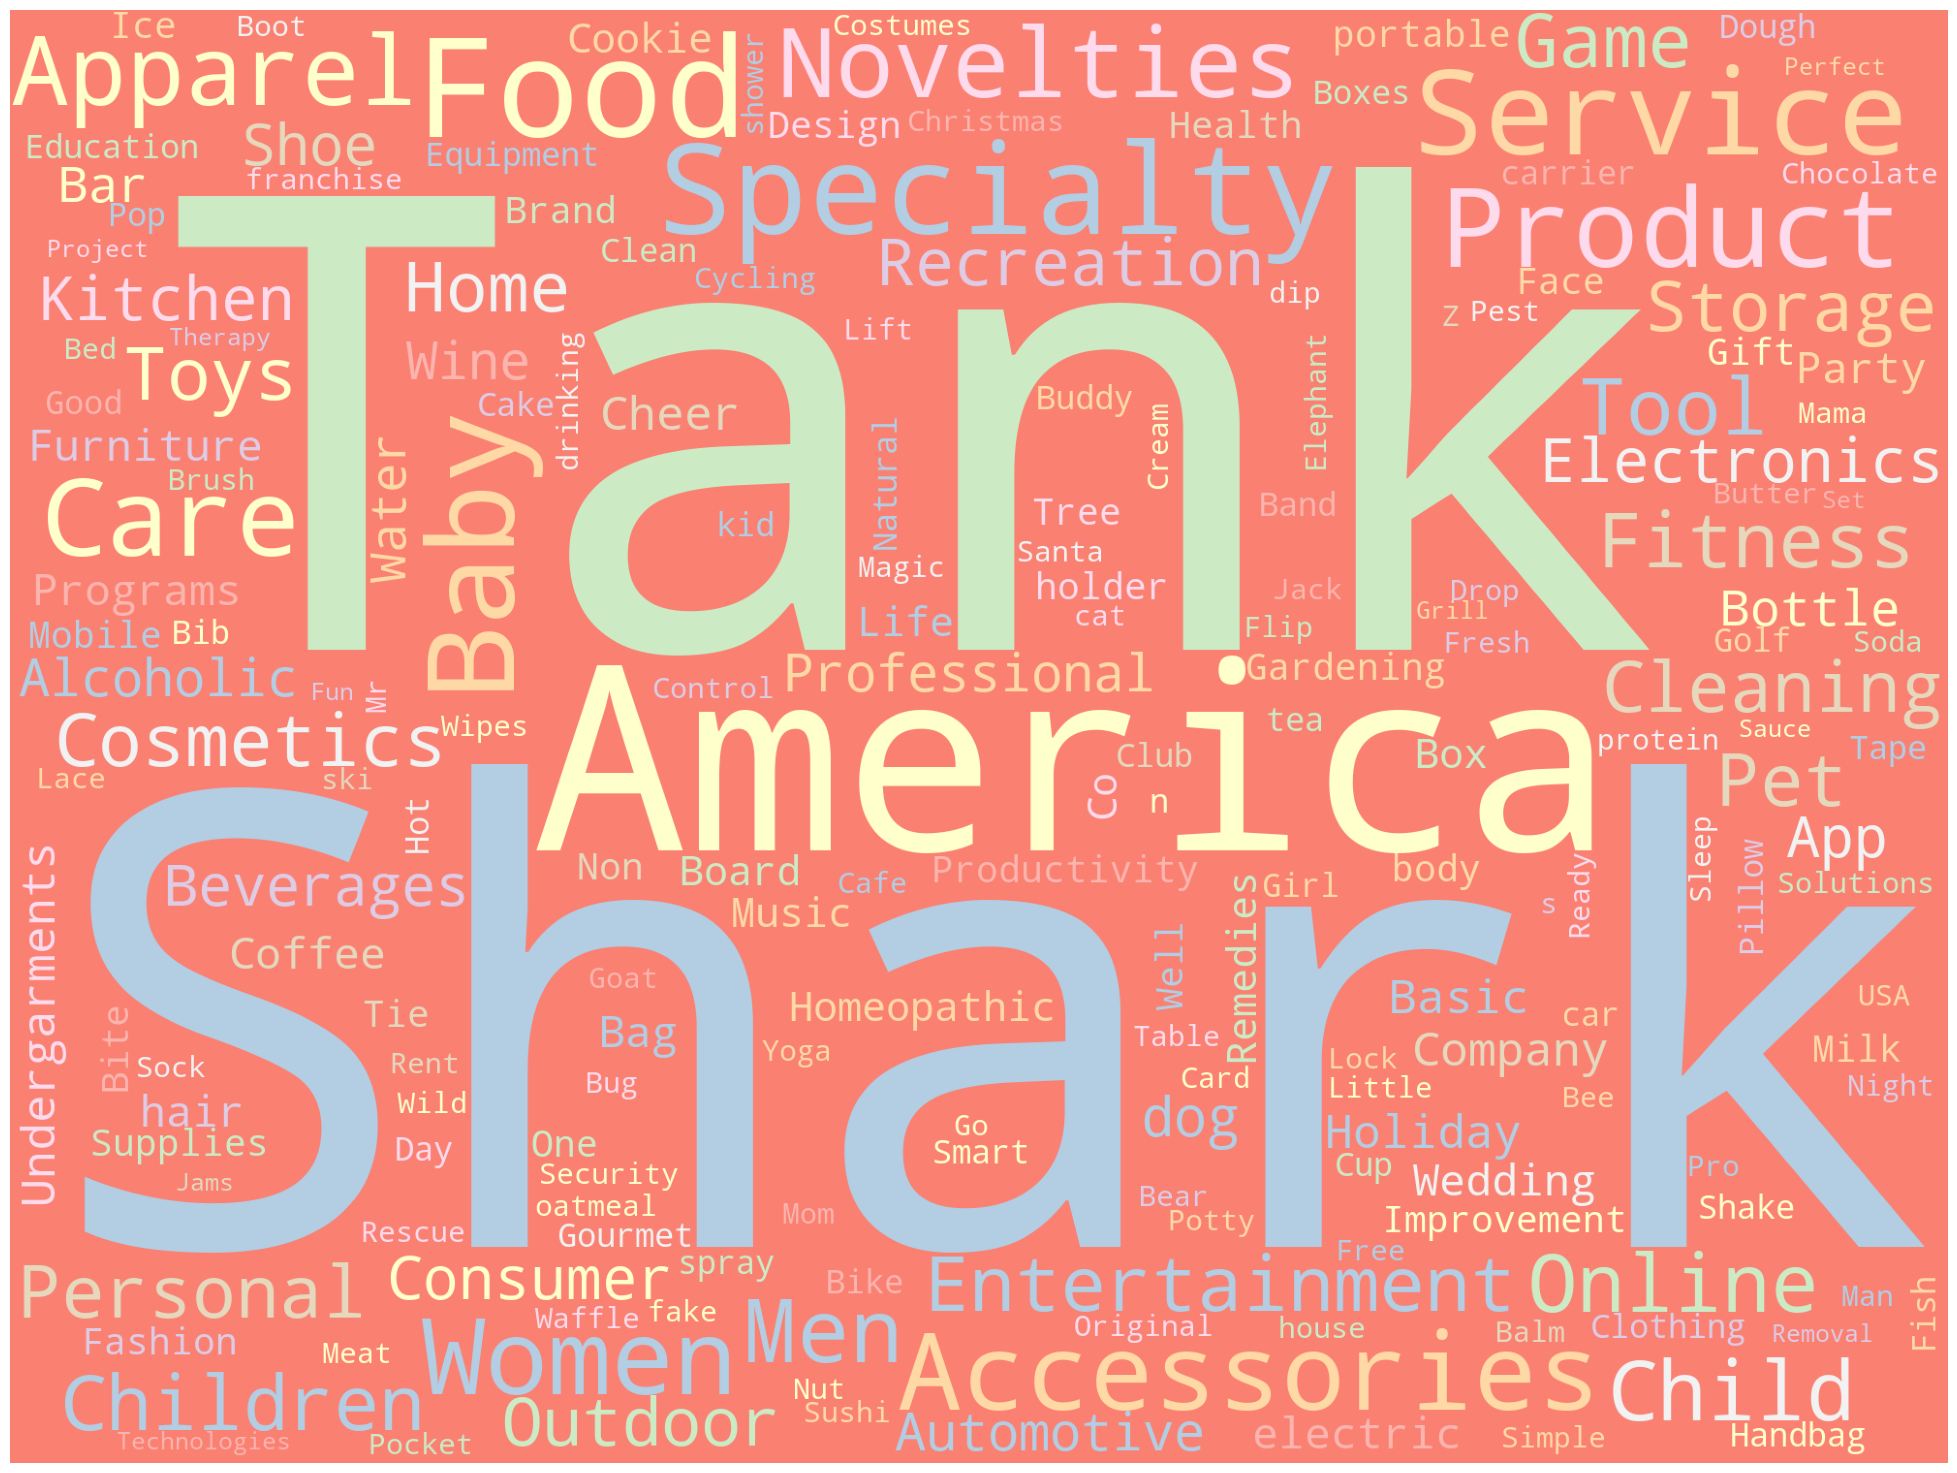

In [44]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [46]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.0
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.0
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [47]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
640              8    23-Sep-16  12-May-17               8           641   
991             12    16-Oct-20  21-May-21               1           992   
992             12    16-Oct-20  21-May-21               1           993   

                  Startup Name            Industry  \
640  Jack'sStands&Marketplaces  Children/Education   
991               Touch Up Cup                 nan   
992                SparkCharge                 nan   

                                  Business Description Pitchers Gender  \
640  Jack's Stands & Marketplaces - lemondate, iced...            Male   
991                                  paint storage cup             NaN   
992                      portable electric car charger             NaN   

    Pitchers State Pitchers City Pitchers Average Age Entrepreneur Names  \
640             CO           NaN                  Kid       Jack Bonneau   
991            NaN           NaN                  NaN                NaN   
992            NaN           NaN                  NaN                NaN   

                  Company Website  Multiple Entrepreneurs  US Viewership  \
640  https://www.jacksstands.com/                    <NA>            NaN   
991                           NaN                    <NA>           4.03   
992                           NaN                    <NA>           4.03   

     Original Ask Amount  Original Offered Equity  Valuation Requested  \
640              50000.0                     10.0             500000.0   
991                  NaN                      NaN                  NaN   
992                  NaN                      NaN                  NaN   

     Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
640         1                NaN                NaN             NaN   
991         1                NaN                NaN             NaN   
992         1                NaN                NaN             NaN   

     Number of sharks in deal  Investment Amount Per Shark  ...  Loan  \
640                       1.0                          0.0  ...   1.0   
991                       NaN                          NaN  ...   NaN   
992                       NaN                          NaN  ...   NaN   

     Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
640                                 NaN                                 NaN   
991                                 NaN                                 NaN   
992                                 NaN                                 NaN   

     Mark Cuban Investment Amount  Mark Cuban Investment Equity  \
640                           NaN                           NaN   
991                           NaN                           NaN   
992                           NaN                           NaN   

     Lori Greiner Investment Amount  Lori Greiner Investment Equity  \
640                             NaN                             NaN   
991                             NaN                             NaN   
992                             NaN                             NaN   

     Robert Herjavec Investment Amount  Robert Herjavec Investment Equity  \
640                                NaN                                NaN   
991                                NaN                                NaN   
992                                NaN                                NaN   

     Daymond John Investment Amount  Daymond John Investment Equity  \
640                             NaN                             NaN   
991                             NaN                             NaN   
992                             NaN                             NaN   

     Kevin O Leary Investment Amount  Kevin O Leary Investment Equity  \
640                              NaN                              NaN   
991                              NaN                              NaN   
992              

In [48]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
72               2    20-Mar-11  13-May-11               3            73   
98               2    20-Mar-11  13-May-11               9            99   
129              3    20-Jan-12  18-May-12               8           130   
352              5    20-Sep-13  16-May-14              23           353   
456              6    26-Sep-14  15-May-15              20           457   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
883             10    07-Oct-18  12-May-19              21           884   
991             12    16-Oct-20  21-May-21               1           992   
992             12    16-Oct-20  21-May-21               1           993   

                  Startup Name            Industry  \
72             ModMomFurniture      Lifestyle/Home   
98                   CitiKitty        Pet Products   
129             Nardo'sNatural      Fashion/Beauty   
352                  HappyFeet      Fashion/Beauty   
456                    Scholly  Children/Education   
834                     Mother   Food and Beverage   
841                   Pristine     Health/Wellness   
844                 KittyKasas        Pet Products   
883  TheBestPocketSqaureHolder      Fashion/Beauty   
991               Touch Up Cup                 nan   
992                SparkCharge                 nan   

                                  Business Description Pitchers Gender  \
72                       Mod Mom Furniture - Furniture          Female   
98                            CitiKitty - Pet Products          Female   
129      Nardo's Natural - Personal Care and Cosmetics            Male   
352                             Happy Feet - Novelties            Male   
456                          Scholly - Online Services            Male   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   
991                                  paint storage cup             NaN   
992                      portable electric car charger             NaN   

    Pitchers State Pitchers City Pitchers Average Age  \
72              AZ     Flagstaff                  NaN   
98              PA   Morrisville                  NaN   
129             FL    Clearwater                  NaN   
352             KY    Louisville                  NaN   
456             PA  Philadelphia                  NaN   
834             TX           NaN                  NaN   
841             TX           NaN                  NaN   
844            NaN           NaN                  NaN   
883             MO           NaN                  NaN   
991            NaN           NaN                  NaN   
992            NaN           NaN                  NaN   

               Entrepreneur Names                  Company Website  \
72              Kiersten Hathcock  http://www.modmomfurniture.com/   
98                Rebecca Rescate        http://www.citikitty.com/   
129  Kyle, KJ, Danny and DJ Nardo    http://www.nardosnatural.com/   
352                     Pat Yates      http://www.buyhappyfeet.com   
456              Christopher Gray        https://www.myscholly.com   
834                           NaN                              NaN   
841                           NaN                              NaN   
844                           NaN                              NaN   
883                           NaN                              NaN   
991                           NaN                              NaN   
992                           NaN                              NaN   

     Multiple Entrepreneurs 

In [49]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
72               2    20-Mar-11  13-May-11               3            73   
98               2    20-Mar-11  13-May-11               9            99   
129              3    20-Jan-12  18-May-12               8           130   
352              5    20-Sep-13  16-May-14              23           353   
456              6    26-Sep-14  15-May-15              20           457   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
883             10    07-Oct-18  12-May-19              21           884   
903             11    29-Sep-19  15-May-20               3           904   

                  Startup Name            Industry  \
72             ModMomFurniture      Lifestyle/Home   
98                   CitiKitty        Pet Products   
129             Nardo'sNatural      Fashion/Beauty   
352                  HappyFeet      Fashion/Beauty   
456                    Scholly  Children/Education   
834                     Mother   Food and Beverage   
841                   Pristine     Health/Wellness   
844                 KittyKasas        Pet Products   
883  TheBestPocketSqaureHolder      Fashion/Beauty   
903                   Eterneva   Business Services   

                                  Business Description Pitchers Gender  \
72                       Mod Mom Furniture - Furniture          Female   
98                            CitiKitty - Pet Products          Female   
129      Nardo's Natural - Personal Care and Cosmetics            Male   
352                             Happy Feet - Novelties            Male   
456                          Scholly - Online Services            Male   
834                 Mother - apple cider vinegar drink      Mixed Team   
841                        Pristine - cleansing sprays      Mixed Team   
844                           Kitty Kasas - cat houses      Mixed Team   
883  The Best Pocket Sqaure Holder - pocket square ...            Male   
903                                        Eterneva -       Mixed Team   

    Pitchers State Pitchers City Pitchers Average Age  \
72              AZ     Flagstaff                  NaN   
98              PA   Morrisville                  NaN   
129             FL    Clearwater                  NaN   
352             KY    Louisville                  NaN   
456             PA  Philadelphia                  NaN   
834             TX           NaN                  NaN   
841             TX           NaN                  NaN   
844            NaN           NaN                  NaN   
883             MO           NaN                  NaN   
903            NaN           NaN                  NaN   

               Entrepreneur Names                  Company Website  \
72              Kiersten Hathcock  http://www.modmomfurniture.com/   
98                Rebecca Rescate        http://www.citikitty.com/   
129  Kyle, KJ, Danny and DJ Nardo    http://www.nardosnatural.com/   
352                     Pat Yates      http://www.buyhappyfeet.com   
456              Christopher Gray        https://www.myscholly.com   
834                           NaN                              NaN   
841                           NaN                              NaN   
844                           NaN                              NaN   
883                           NaN                              NaN   
903                           NaN                              NaN   

     Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
72                        0            NaN              90000.0   
98                        0            NaN             100000.0   
129                       1            NaN              75000.0   
352                       0            NaN             375000.0   
456                     

In [50]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
72               2    20-Mar-11  13-May-11               3            73   
98               2    20-Mar-11  13-May-11               9            99   
129              3    20-Jan-12  18-May-12               8           130   
352              5    20-Sep-13  16-May-14              23           353   
456              6    26-Sep-14  15-May-15              20           457   
834             10    07-Oct-18  12-May-19               8           835   
841             10    07-Oct-18  12-May-19              10           842   
844             10    07-Oct-18  12-May-19              11           845   
903             11    29-Sep-19  15-May-20               3           904   

        Startup Name            Industry  \
72   ModMomFurniture      Lifestyle/Home   
98         CitiKitty        Pet Products   
129   Nardo'sNatural      Fashion/Beauty   
352        HappyFeet      Fashion/Beauty   
456          Scholly  Children/Education   
834           Mother   Food and Beverage   
841         Pristine     Health/Wellness   
844       KittyKasas        Pet Products   
903         Eterneva   Business Services   

                              Business Description Pitchers Gender  \
72                   Mod Mom Furniture - Furniture          Female   
98                        CitiKitty - Pet Products          Female   
129  Nardo's Natural - Personal Care and Cosmetics            Male   
352                         Happy Feet - Novelties            Male   
456                      Scholly - Online Services            Male   
834             Mother - apple cider vinegar drink      Mixed Team   
841                    Pristine - cleansing sprays      Mixed Team   
844                       Kitty Kasas - cat houses      Mixed Team   
903                                    Eterneva -       Mixed Team   

    Pitchers State Pitchers City Pitchers Average Age  \
72              AZ     Flagstaff                  NaN   
98              PA   Morrisville                  NaN   
129             FL    Clearwater                  NaN   
352             KY    Louisville                  NaN   
456             PA  Philadelphia                  NaN   
834             TX           NaN                  NaN   
841             TX           NaN                  NaN   
844            NaN           NaN                  NaN   
903            NaN           NaN                  NaN   

               Entrepreneur Names                  Company Website  \
72              Kiersten Hathcock  http://www.modmomfurniture.com/   
98                Rebecca Rescate        http://www.citikitty.com/   
129  Kyle, KJ, Danny and DJ Nardo    http://www.nardosnatural.com/   
352                     Pat Yates      http://www.buyhappyfeet.com   
456              Christopher Gray        https://www.myscholly.com   
834                           NaN                              NaN   
841                           NaN                              NaN   
844                           NaN                              NaN   
903                           NaN                              NaN   

     Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
72                        0            NaN              90000.0   
98                        0            NaN             100000.0   
129                       1            NaN              75000.0   
352                       0            NaN             375000.0   
456                       0            NaN              40000.0   
834                    <NA>            NaN             400000.0   
841                    <NA>            NaN              50000.0   
844                    <NA>            NaN             200000.0   
903                    <NA>            NaN             600000.0   

     Original Offered Equity  Valuation Requested  Got Deal  \
72                      25.0             360000.0         1   
98                      15.0     